<a href="https://colab.research.google.com/github/hrbolek/simodes/blob/main/notebooks/examplesBcz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokročilé příklady použití simodes

In [376]:
!pip install simodes

In [377]:
import matplotlib.pyplot as plt     # for plots
import pandas as pd                 # for tables
import numpy as np                  # for matrices

from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = (12, 8)

In [378]:
def plot3D(x, y, z, figure = None, showIt=True, **params):
    gph = figure
    if gph is None:
        gph = plt.figure(figsize=(15,8)).gca(projection='3d')

    gph.plot(x, y, z, **params)

    if showIt:
        plt.show()
    return gph

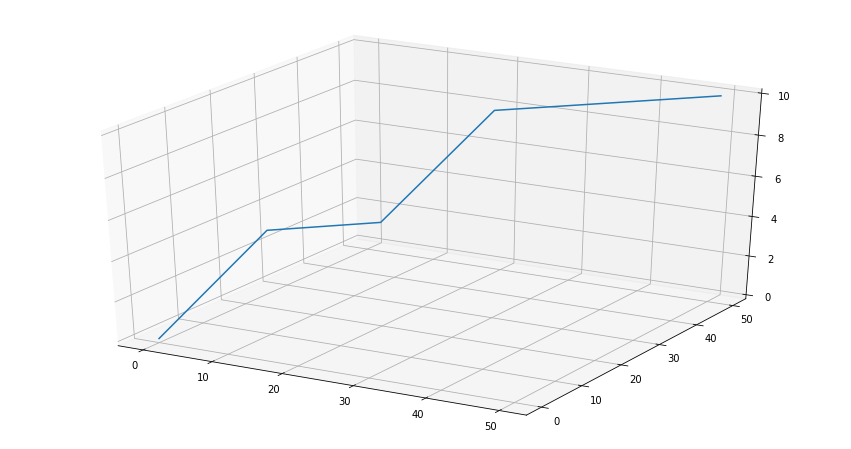

In [379]:
#=================#
# example of use  #
#=================#
x = [0, 10, 20, 30, 40, 50]
y = [0, 10, 20, 30, 40, 50]
z = [0, 5, 5, 10, 10, 10]
plot3D(x, y, z); # yes, semicolon has a meaning :)

In [380]:
def plotData3D(rows, x='x', y='y', z='z', figure=None, showIt=True, **params):
    getx = lambda row: row[x]
    if callable(x):
        getx = x
    gety = lambda row: row[y]
    if callable(y):
        gety = y
    getz = lambda row: row[z]
    if callable(z):
        getz = z
    xx = []
    yy = []
    zz = []
    for row in rows:
        xx.append(getx(row))
        yy.append(gety(row))
        zz.append(getz(row))
    return plot3D(xx, yy, zz, figure, showIt, **params)

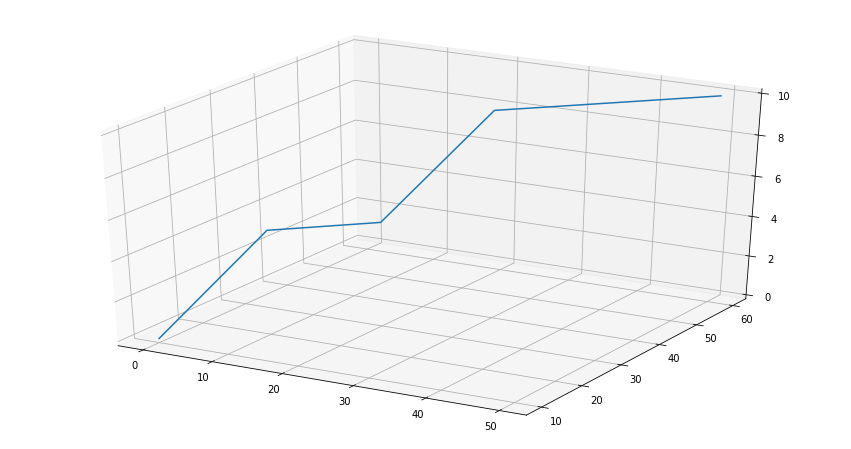

In [381]:
rows = [
    {'x': 0, 'y': 10, 'z': 0},
    {'x': 10, 'y': 20, 'z': 5},
    {'x': 20, 'y': 30, 'z': 5},
    {'x': 30, 'y': 40, 'z': 10},
    {'x': 40, 'y': 50, 'z': 10},
    {'x': 50, 'y': 60, 'z': 10}
]
plotData3D(rows);

## Příklad A

### Importy z knihovny 

In [382]:
import simodes
from simodes import Simulator
from simodes import simpleODESolver
from simodes import createDataSelector
from simodes.models import definePlane
from simodes.models import computeState

### Inicializace simulace

In [383]:
sim = Simulator()
currentState = sim.GetState()
print(currentState)

{'odeModels': {}, 'eventList': {'events': [], 'activeEvent': None}, 'logs': []}


### Příprava modelu

In [384]:
pathForPlaneList = [[1000, 250, 20], [500, 125, 10], [0, 0, 0]]
pathForPlane = iter(pathForPlaneList)

In [385]:
planeState0 = computeState(2000, 600, 20, 100, 0, 2)

In [386]:
planeModel = definePlane(pathToFlyThrough=pathForPlane)
planeSolver = simpleODESolver(planeModel, 0, planeState0, 1e300, 0.0625)

In [387]:
planeId = sim.AttachODESolver(planeSolver)

### Příprava pro transformaci dat

In [388]:
masterMap = {
    'plane_': lambda item: item[planeId]
}

In [389]:
dataDescriptor = {
    't': lambda item: item['state']['time'],
    'x': lambda item: item['state']['y'][0],
    'y': lambda item: item['state']['y'][1],
    'z': lambda item: item['state']['y'][2]
}

In [390]:
dataSelector = createDataSelector(masterMap, dataDescriptor)

### Cyklus simulace

In [391]:
results = []
for index, currentResult in enumerate(sim.Run()):
    partialResult = dataSelector(currentResult)
    results.append(partialResult)
    if index >= 700:
        break

### Zpracování dat

In [392]:
import pandas as pd

def displayData(data):
    df = pd.DataFrame(data)
    display(df)

In [393]:
displayData(results)

,plane_t,plane_x,plane_y,plane_z
0,0.000000,2000.000000,600.000000,20.000000
1,0.062500,1997.363631,605.666705,20.000000
2,0.125000,1994.656636,611.300014,20.000000
3,0.187500,1991.879438,616.899047,20.000000
4,0.250000,1989.032471,622.462927,20.000000
...,...,...,...,...
696,28.351311,28.558357,242.732792,9.884336
697,28.413811,27.068926,248.802682,9.879651
698,28.445589,26.340744,251.895965,9.877269
699,28.446208,26.326770,251.956201,9.877223


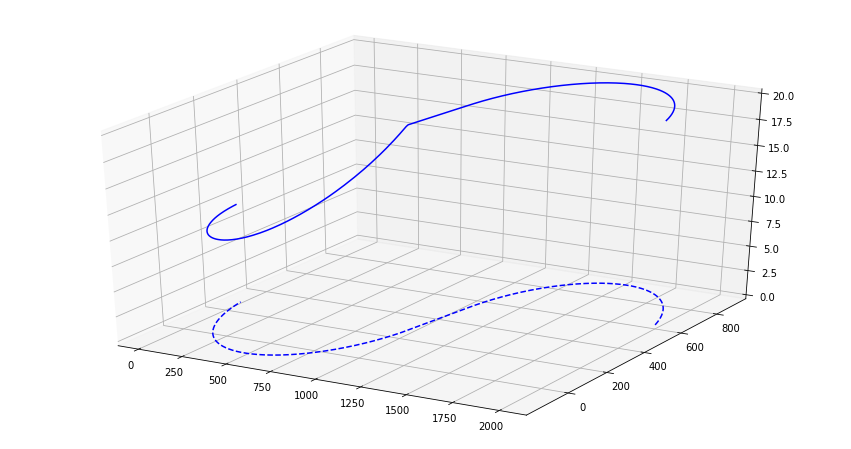

In [394]:
getpx = lambda row: row['plane_x']
getpy = lambda row: row['plane_y']
get0 = lambda row: 0

fig = plotData3D(results, x='plane_x', y='plane_y', z='plane_z', color='blue', showIt=False)
plotData3D(results, x=getpx, y=getpy, z=get0, figure=fig, color='blue', ls='--')
